In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_lib import *

In [2]:
# plotting
def plot_b0_b1(mal, F1, F2, figname):
    plt.style.use('seaborn')
    plt.figure()
    plt.plot(mal, F1, marker='s', markersize=6, linewidth=4, label='D')
    plt.plot(mal, F2, marker='s', markersize=6, linewidth=4, linestyle='--', label='D\'')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('resources allocated to attacker', fontsize=22)
    plt.ylabel('frequency', fontsize=22)
    plt.legend(loc='best', fontsize=22)
    plt.grid(True)
    plt.savefig(figname, bbox_inches="tight")
    plt.show()

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_10931/4233206090.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


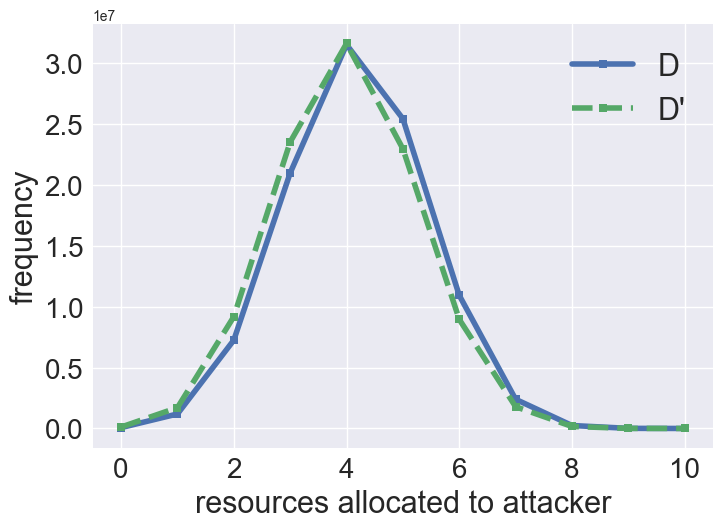

akr - Simulation (k = 10), after RA: 1.0601460078403135
utility: 0.41614255800000155


In [3]:
# Parameter default setup
x = 20
x0 = 0
p = 0
c = 0
lamda = 0
V=1

noise_type = 'akr'
RD = 100000000 # rounds
k = 10
m = 10  # best strategy
S = [1]  # epsilon
result = []
utility = []
delta = 10 ** (-6)
for s in S:
    eps = s
    miu = V - V * np.log(2 * delta) / eps
    F = []
    F_prime = []
    a = []
    b = []
    uti = []
    for rd in range(RD):
        f, f_prime = add_noise(x0=x0, k=k, m=m, noise_type=noise_type, x=x, p=p, c=c, lamda=lamda, miu=miu, s=1 / s)
        F.append(f)
        F_prime.append(f_prime)
        ra_f, ra_f_p, u = allocation(f=f, f_prime=f_prime, m=m, k=k)
        a.append(ra_f)
        b.append(ra_f_p)
        uti.append(u)
        if rd % 10000000 == 0:
            print("\r{0}".format((float(rd) / RD) * 100))

    utility.append(np.mean(uti))
    Before_RA_F, Before_RA_F_p = counter_process(F=F, F_prime=F_prime)
    After_RA_F, After_RA_F_p = counter_process(F=a, F_prime=b)
    plot_b0_b1(range(k+1), After_RA_F, After_RA_F_p, figname='akr.pdf')
    r2 = non_inf(np.log(find_max(After_RA_F, After_RA_F_p)))
    print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA:", max(r2))
    result.append(max(r2))
    print("utility:", np.mean(uti))
